## Dependecies

In [ ]:
import json

import random

import torch



import torch.optim as optim

from torchvision import models, transforms, datasets

from torch.utils.data import DataLoader, random_split, Subset

import numpy as np

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import seaborn as sb

import matplotlib.pyplot as plt

from tqdm import tqdm



# Device configuration

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device used: {DEVICE}")

Device used: cuda


## Set random seed for reproducibility

In [7]:
from utils.utils import set_seed, SEED
set_seed(SEED)

## Parameters (arbitrary chosen)

In [3]:
BATCH_SIZE = 32

LEARNING_RATE = 0.001

EPOCHS = 10

## Prepare Dataloaders

In [6]:
from utils.utils import init_dataloaders

## Simple CNN

In [2]:
from models.simple_cnn import CNN

## Train loop

In [ ]:
from utils.train_test_metrics import train_model

## Plot losses

In [ ]:
from utils.train_test_metrics import plot_training_history

## Test function

### Test loop

In [ ]:
from utils.train_test_metrics import test_model

### Metrics

In [ ]:
from utils.train_test_metrics import show_metrics

# INIT MODEL

In [ ]:
from models.simple_cnn import init_model_cnn

In [ ]:
model, model_name, criterion, optimizer, transform = init_model_cnn()

Init model...
Done initializing model.
Model ID: 134981149185680, Optimizer ID: 134981149184192, Criterion ID: 134981149185392


# INIT DATALOADERS AND CALL TRAIN

In [ ]:
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
mnist_data_split_path = 'mnist_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(dataset,test_dataset), 
    info_file_path = mnist_data_split_path, 
    val_ratio=0.2
    )

Prepare DataLoaders...
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 43065118.36it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1158583.46it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10634728.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3280614.56it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Done preparing DataLoaders.


In [13]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Training Epoch 1/10: 100%|██████████| 1500/1500 [00:15<00:00, 99.90it/s] 


Epoch [1/10], Train Loss: 0.1487, Train Accuracy: 0.9550, Val Loss: 0.0622, Val Accuracy: 0.9813


Training Epoch 2/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.89it/s]


Epoch [2/10], Train Loss: 0.0466, Train Accuracy: 0.9854, Val Loss: 0.0466, Val Accuracy: 0.9862


Training Epoch 3/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.51it/s]


Epoch [3/10], Train Loss: 0.0325, Train Accuracy: 0.9901, Val Loss: 0.0384, Val Accuracy: 0.9886


Training Epoch 4/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.59it/s]


Epoch [4/10], Train Loss: 0.0231, Train Accuracy: 0.9924, Val Loss: 0.0522, Val Accuracy: 0.9848


Training Epoch 5/10: 100%|██████████| 1500/1500 [00:13<00:00, 107.94it/s]


Epoch [5/10], Train Loss: 0.0181, Train Accuracy: 0.9940, Val Loss: 0.0391, Val Accuracy: 0.9896


Training Epoch 6/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.40it/s]


Epoch [6/10], Train Loss: 0.0143, Train Accuracy: 0.9952, Val Loss: 0.0462, Val Accuracy: 0.9883


Training Epoch 7/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.38it/s]


Epoch [7/10], Train Loss: 0.0110, Train Accuracy: 0.9963, Val Loss: 0.0388, Val Accuracy: 0.9891


Training Epoch 8/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.31it/s]


Epoch [8/10], Train Loss: 0.0090, Train Accuracy: 0.9972, Val Loss: 0.0623, Val Accuracy: 0.9846


Training Epoch 9/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.28it/s]


Epoch [9/10], Train Loss: 0.0094, Train Accuracy: 0.9970, Val Loss: 0.0453, Val Accuracy: 0.9902


Training Epoch 10/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.98it/s]


Epoch [10/10], Train Loss: 0.0065, Train Accuracy: 0.9978, Val Loss: 0.0433, Val Accuracy: 0.9902
Training complete for Simple_CNN_MNIST. Training stats saved to 'Simple_CNN_MNIST_history.json'.


# PLOT LOSSES

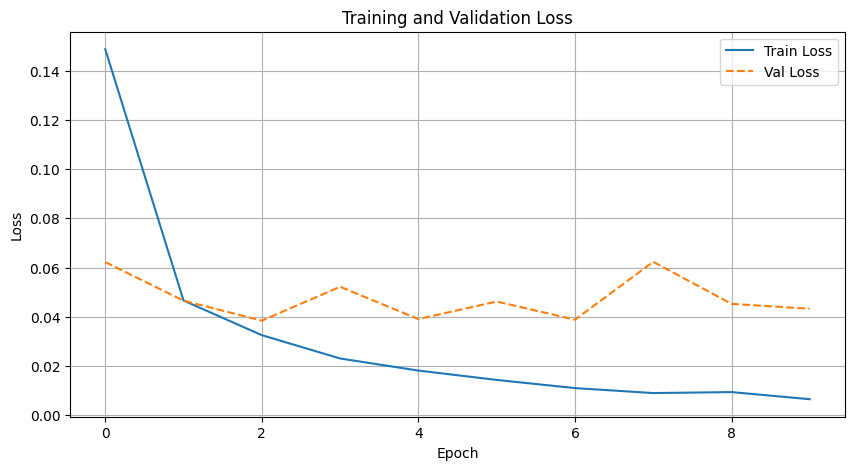

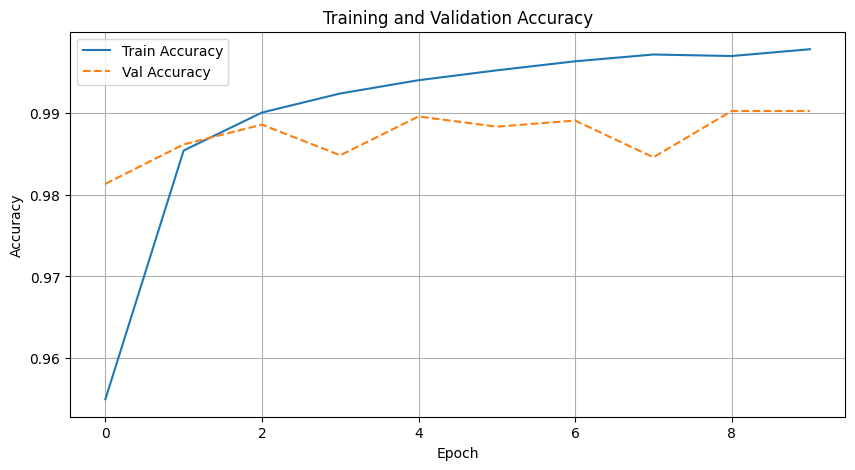

In [14]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

# CALL TEST

In [ ]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: Simple_CNN_MNIST


Evaluating Model: 100%|██████████| 313/313 [00:01<00:00, 164.37it/s]

Predictions and labels saved to Simple_CNN_MNIST_predictions.json


# METRICS

Metrics for Simple_CNN_MNIST:
  - Test Accuracy: 0.9909
  - Precision: 0.9909
  - Recall: 0.9909
  - F1 Score: 0.9909


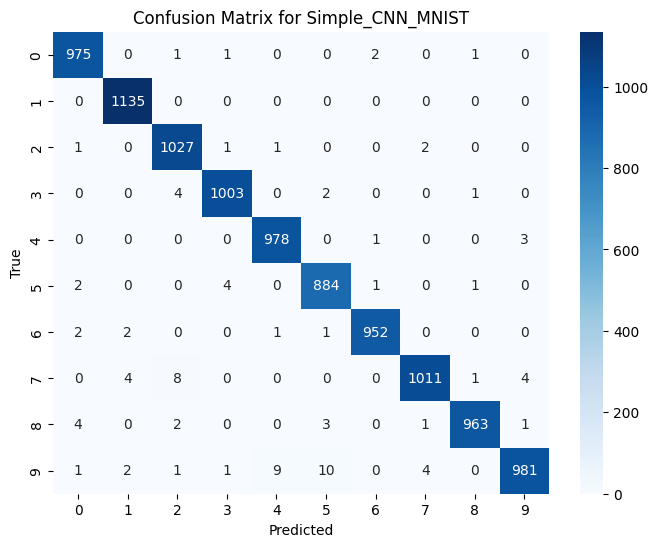

In [16]:
predictions_path = f'{model_name}_predictions.json'
show_metrics(predictions_path, model_name)

# NAIVE UNLEARNING

### Select samples to unlearn (10% random)

In [17]:
def select_samples_to_unlearn(data_splits_file, unlearn_ratio=0.1):

    filename = "mnist_samples_to_unlearn.json"
    
    # Load data splits
    with open(data_splits_file, "r") as f:
        splits = json.load(f)

    # Combine train and validation indices
    combined_indices = splits["train_indices"] + splits["val_indices"]

    set_seed(SEED)
    unlearn_count = int(unlearn_ratio * len(combined_indices))
    unlearn_indices = random.sample(combined_indices, unlearn_count)

    # Save unlearn indices
    with open(filename, "w") as f:
        json.dump(unlearn_indices, f)

    print(f"Unlearn indices saved to {filename}")
    return filename

### Update data splits.

In [18]:
def update_splits_after_unlearning(data_splits_file, unlearn_file):

    filename = "mnist_updated_data_splits.json"
    
    # Load data splits and unlearn indices
    with open(data_splits_file, "r") as f:
        splits = json.load(f)
    with open(unlearn_file, "r") as f:
        unlearn_indices = json.load(f)

    # Extract unlearn indices
    unlearn_indices_set = {entry["index"] for entry in unlearn_indices}

    # Update splits
    updated_splits = {
        "train_indices": [
            entry for entry in splits["train_indices"] if entry["index"] not in unlearn_indices_set
        ],
        "val_indices": [
            entry for entry in splits["val_indices"] if entry["index"] not in unlearn_indices_set
        ],
        "test_indices": splits["test_indices"]  # Test set remains unchanged
    }

    # Save updated splits
    with open(filename, "w") as f:
        json.dump(updated_splits, f)

    print(f"Updated splits saved to {filename}")
    return filename

### Recreate Dataloaders from json files

In [19]:
def recreate_dataloaders(data_splits_file, transform, dataset=None):

    print('Recreating DataLoaders...')
    
    dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    
    # Load updated splits
    with open(data_splits_file, "r") as f:
        splits = json.load(f)

    # Extract indices
    train_indices = [entry["index"] for entry in splits["train_indices"]]
    val_indices = [entry["index"] for entry in splits["val_indices"]]
    test_indices = [entry["index"] for entry in splits["test_indices"]]

    # Create subsets
    train_dataset = Subset(dataset, train_indices)
    val_dataset = Subset(dataset, val_indices)
    test_dataset = Subset(dataset, test_indices)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print('Done recreating DataLoaders.')
    
    return train_loader, val_loader, test_loader

# CALL RE-TRAIN

### Init new model

In [20]:
model, model_name, criterion, optimizer, transform = init_model()
model_name = "naive_unlearning_" + model_name
print(model_name)

Init model...
Done initializing model.
Model ID: 134980435015040, Optimizer ID: 134980435012016, Criterion ID: 134980435012304
naive_unlearning_Simple_CNN_MNIST


### Init data

In [21]:
data_splits_file = "mnist_data_splits.json"

In [22]:
#ONLY ONCE
unlearn_file = select_samples_to_unlearn(data_splits_file, unlearn_ratio=0.1)

Unlearn indices saved to mnist_samples_to_unlearn.json


In [23]:
updated_data_splits_file = update_splits_after_unlearning(data_splits_file, unlearn_file)

Updated splits saved to mnist_updated_data_splits.json


In [24]:
train_loader, val_loader, test_loader = recreate_dataloaders(data_splits_file, transform, dataset=None)

Recreating DataLoaders...
Done recreating DataLoaders.


### Re-train

In [25]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Training Epoch 1/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.64it/s]


Epoch [1/10], Train Loss: 0.1442, Train Accuracy: 0.9555, Val Loss: 0.0598, Val Accuracy: 0.9824


Training Epoch 2/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.59it/s]


Epoch [2/10], Train Loss: 0.0471, Train Accuracy: 0.9852, Val Loss: 0.0472, Val Accuracy: 0.9862


Training Epoch 3/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.65it/s]


Epoch [3/10], Train Loss: 0.0304, Train Accuracy: 0.9907, Val Loss: 0.0437, Val Accuracy: 0.9872


Training Epoch 4/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.45it/s]


Epoch [4/10], Train Loss: 0.0239, Train Accuracy: 0.9927, Val Loss: 0.0427, Val Accuracy: 0.9873


Training Epoch 5/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.13it/s]


Epoch [5/10], Train Loss: 0.0167, Train Accuracy: 0.9944, Val Loss: 0.0372, Val Accuracy: 0.9894


Training Epoch 6/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.22it/s]


Epoch [6/10], Train Loss: 0.0130, Train Accuracy: 0.9956, Val Loss: 0.0535, Val Accuracy: 0.9869


Training Epoch 7/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.18it/s]


Epoch [7/10], Train Loss: 0.0127, Train Accuracy: 0.9957, Val Loss: 0.0613, Val Accuracy: 0.9859


Training Epoch 8/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.83it/s]


Epoch [8/10], Train Loss: 0.0090, Train Accuracy: 0.9968, Val Loss: 0.0457, Val Accuracy: 0.9892


Training Epoch 9/10: 100%|██████████| 1500/1500 [00:14<00:00, 105.51it/s]


Epoch [9/10], Train Loss: 0.0089, Train Accuracy: 0.9969, Val Loss: 0.0541, Val Accuracy: 0.9884


Training Epoch 10/10: 100%|██████████| 1500/1500 [00:14<00:00, 106.56it/s]


Epoch [10/10], Train Loss: 0.0081, Train Accuracy: 0.9974, Val Loss: 0.0457, Val Accuracy: 0.9903
Training complete for naive_unlearning_Simple_CNN_MNIST. Training stats saved to 'naive_unlearning_Simple_CNN_MNIST_history.json'.


### History loss

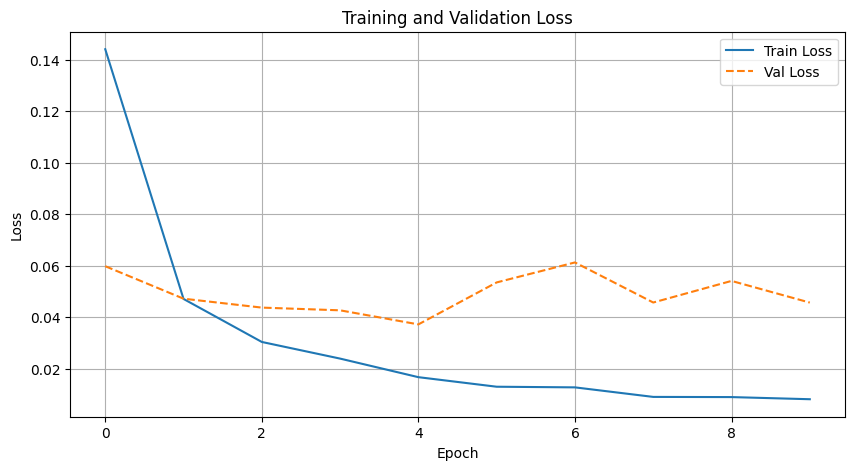

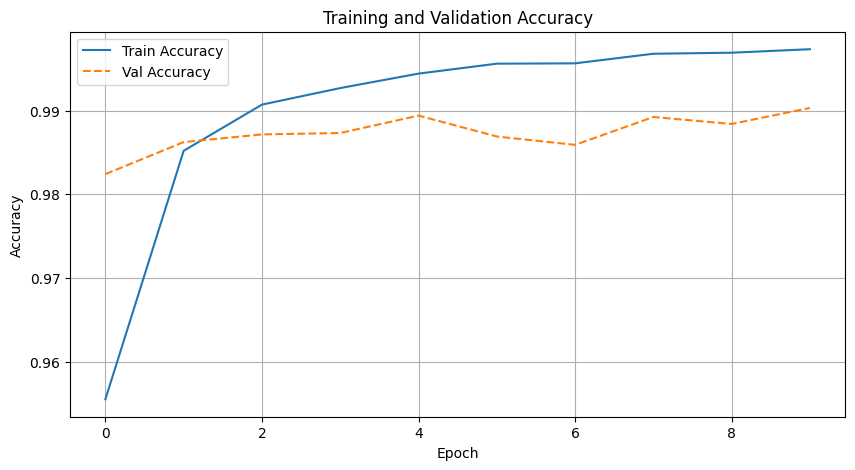

In [26]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

### Re-test

In [27]:
print(f"Loading and testing model: {model_name}")

model.load_state_dict(torch.load(f"{model_name}_base_model.pth", weights_only=True))

test_model(model, model_name, test_loader)

Loading and testing model: naive_unlearning_Simple_CNN_MNIST


Evaluating Model: 100%|██████████| 313/313 [00:01<00:00, 159.58it/s]

Predictions and labels saved to naive_unlearning_Simple_CNN_MNIST_predictions.json


### Metrics

Metrics for naive_unlearning_Simple_CNN_MNIST:
  - Test Accuracy: 0.9972
  - Precision: 0.9972
  - Recall: 0.9972
  - F1 Score: 0.9972


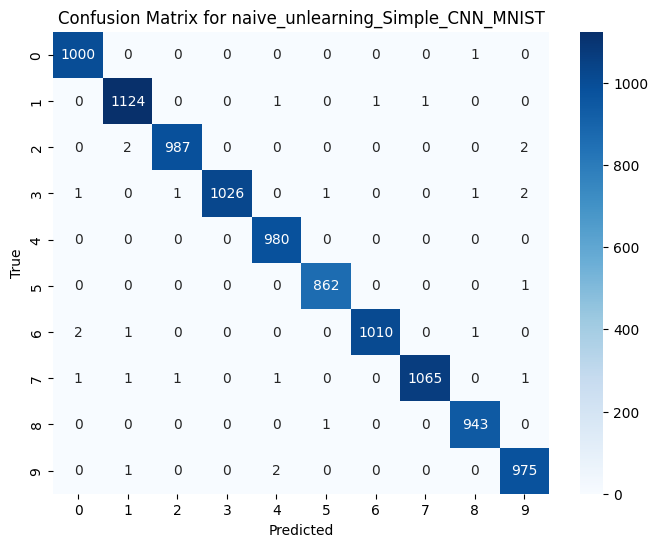

In [28]:
predictions_path = f'{model_name}_predictions.json'
show_metrics(predictions_path, model_name)